ANNDA LAB 2

PART I: Batch mode training using least squares - supervised learning of network weights

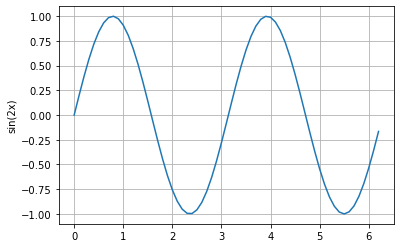

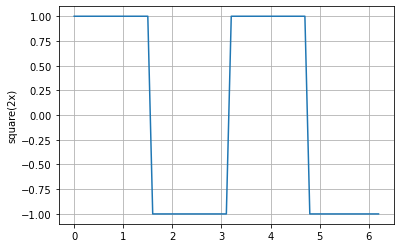

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

the_x_for_train = np.arange(0,2*np.pi,0.1)
the_x_for_test = np.arange(0.05,2*np.pi,0.1)

#print(len(the_x_for_train))

f1 = lambda x: np.sin(2*x)

def f2(x):
    if np.sin(x) >= 0:
        return 1
    else:
        return -1

phi = lambda x,mu,sigma: np.exp((-(x-mu)**2)/(2*sigma**2))

training_set_1 = np.array([f1(x) for x in the_x_for_train])
training_set_2 = np.array([f2(2*x) for x in the_x_for_train])
plt.figure()
plt.plot(the_x_for_train,training_set_1)
plt.grid()
plt.ylabel('sin(2x)')
plt.figure()
plt.plot(the_x_for_train,training_set_2)
plt.grid()
plt.ylabel('square(2x)')


testing_set_1 = np.array([f1(x) for x in the_x_for_test])
testing_set_2 = np.array([f2(2*x) for x in the_x_for_test])




The residual error for 1 nodes is 0.606731409174303
The residual error for 2 nodes is 0.5679995253577816
The residual error for 3 nodes is 0.5679995461135783
The residual error for 4 nodes is 0.4226256686934988
The residual error for 5 nodes is 0.5678137568236795
The residual error for 6 nodes is 0.2278326626547891
The residual error for 7 nodes is 0.11899530984934059
The residual error for 8 nodes is 0.0473651006301127
The residual error for 9 nodes is 0.017438608010967045
The residual error for 10 nodes is 0.013011260714730764
The residual error for 11 nodes is 0.011866239095690229
The residual error for 12 nodes is 0.009505411388179464
The residual error for 13 nodes is 0.008143892011359948
The residual error for 14 nodes is 0.005900368473247645
The residual error for 15 nodes is 0.004916906624516068
The residual error for 16 nodes is 0.003307623278797877
The residual error for 17 nodes is 0.0026725789938661457
The residual error for 18 nodes is 0.0016152933534915185
The residual er

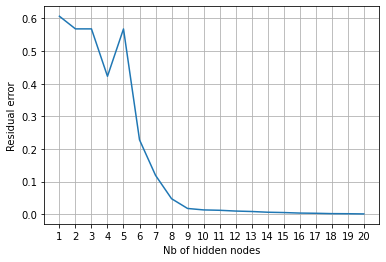

"plt.figure()\nplt.plot(RBF_nodes, the_testing_errors)\nplt.grid()\nplt.xlabel('Nb of hidden nodes')\nplt.ylabel('Test error')\nplt.ylim(0, 5)\nprint('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')\nplt.show()"

In [6]:

RBF_nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
the_testing_errors = []
the_residual_errors = []


for i in range(len(RBF_nodes)):

    #Initialization of the matrix
    nb_RBF_nodes = RBF_nodes[i]
    #print(nb_RBF_nodes)
    sigma = 0.5       #Quelle valeur prendre ?
    the_mu = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
    #print(len(the_mu))
    matrix_phi_transpose = []

    for i in range(nb_RBF_nodes):
        matrix_phi_transpose.append([phi(x,the_mu[i],sigma) for x in the_x_for_train])

    matrix_phi_transpose= np.array(matrix_phi_transpose)
    matrix_phi = matrix_phi_transpose.T    

    the_fk = training_set_1

    #Solving the system

    A = matrix_phi.T @ matrix_phi
    Y = matrix_phi.T @ the_fk
    W = np.linalg.solve(A,Y)
    #print(np.linalg.det(A))

    #Computing the residual error
    residual_error = np.mean(np.abs(matrix_phi @ W - the_fk))
    the_residual_errors.append(residual_error)
    print('The residual error for '+str(nb_RBF_nodes)+' nodes is ' + str(residual_error))


    """#Computing the testing error
    matrix_phi_transpose_test = []
    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_test.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])
    matrix_phi_transpose_test = np.array(matrix_phi_transpose_test)
    matrix_phi_test = matrix_phi_transpose_test.T

    testing_error = np.sum(np.power(matrix_phi_test @ W - the_fk,2))
    the_testing_errors.append(testing_error)"""



plt.figure()
plt.plot(RBF_nodes,the_residual_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Residual error')
plt.xticks(RBF_nodes)
print('The mimimal error is ' + str(min(the_residual_errors)) + ' for ' + str(RBF_nodes[np.argmin(the_residual_errors)]) + ' hidden nodes')
plt.show()

"""plt.figure()
plt.plot(RBF_nodes, the_testing_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Test error')
plt.ylim(0, 5)
print('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')
plt.show()"""
# how many units are needed for the aforementioned error thresholds?


63
63


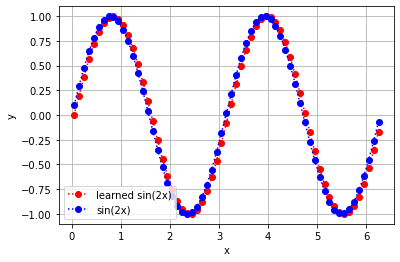

In [7]:
nb_RBF_nodes = 20
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
the_testing_errors = []

sigma = 0.5       #Quelle valeur prendre ?
the_mu = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
#print(len(the_mu))
matrix_phi_transpose = []

for i in range(nb_RBF_nodes):
    matrix_phi_transpose.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])

matrix_phi_transpose= np.array(matrix_phi_transpose)
matrix_phi = matrix_phi_transpose.T    

 #Solving the system

A = matrix_phi.T @ matrix_phi
Y = matrix_phi.T @ the_fk
W = np.linalg.solve(A,Y)

"""#Computing the training error
test_error = np.mean(np.abs(matrix_phi @ W - testing_set_1))
the_testing_errors.append(test_error)"""

print(len(the_x_for_test))
print(len(matrix_phi @ W))


plt.figure()
plt.plot(the_x_for_test, matrix_phi @ W, 'r:o', label='learned sin(2x)')
plt.plot(the_x_for_test, np.sin(2*the_x_for_test), "b:o", label="sin(2x)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()




The residual error for 1 nodes is 0.8889563618669242
The residual error for 2 nodes is 0.7878177430422654
The residual error for 3 nodes is 0.7877681188072037
The residual error for 4 nodes is 0.5086692961319105
The residual error for 5 nodes is 0.7839389081190997
The residual error for 6 nodes is 0.3564303241185847
The residual error for 7 nodes is 0.29123494607213674
The residual error for 8 nodes is 0.28767472376109116
The residual error for 9 nodes is 0.30244331200585256
The residual error for 10 nodes is 0.27429960217228044
The residual error for 11 nodes is 0.2497830970166989
The residual error for 12 nodes is 0.2158426665661872
The residual error for 13 nodes is 0.24566525249331933
The residual error for 14 nodes is 0.17502657466441732
The residual error for 15 nodes is 0.18000030345297555
The residual error for 16 nodes is 0.17891098614833945
The residual error for 17 nodes is 0.1764873198643035
The residual error for 18 nodes is 0.1660265089784251
The residual error for 19 nod

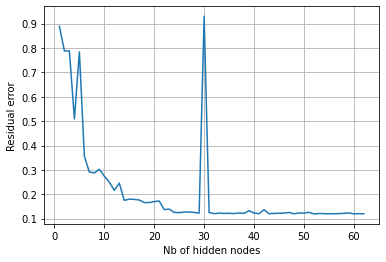

"plt.figure()\nplt.plot(RBF_nodes, the_testing_errors)\nplt.grid()\nplt.xlabel('Nb of hidden nodes')\nplt.ylabel('Test error')\nplt.ylim(0, 5)\nprint('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')\nplt.show()"

In [8]:
RBF_nodes = [i for i in range(1,63)]
the_testing_errors_2 = []
the_residual_errors_2 = []


for i in range(len(RBF_nodes)):

    #Initialization of the matrix

    nb_RBF_nodes = RBF_nodes[i]
    #print(nb_RBF_nodes)
    sigma = 0.5       #Quelle valeur prendre ?
    the_mu_2 = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
    #print(len(the_mu))
    matrix_phi_transpose_2 = []

    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_2.append([phi(x,the_mu_2[i],sigma) for x in the_x_for_train])

    matrix_phi_transpose_2= np.array(matrix_phi_transpose_2)
    matrix_phi_2 = matrix_phi_transpose_2.T    

    the_fk_2 =training_set_2

    #Solving the system

    A_2 = matrix_phi_2.T @ matrix_phi_2
    Y_2 = matrix_phi_2.T @ the_fk_2
    W_2 = np.linalg.solve(A_2,Y_2)
    #print(np.linalg.det(A))

    #Computing the training error
    residual_error_2 = np.mean(np.abs(matrix_phi_2 @ W_2 - the_fk_2))
    the_residual_errors_2.append(residual_error_2)
    print('The residual error for '+str(nb_RBF_nodes)+' nodes is ' + str(residual_error_2))
    


    """#Computing the testing error
    matrix_phi_transpose_test = []
    for i in range(nb_RBF_nodes):
        matrix_phi_transpose_test.append([phi(x,the_mu[i],sigma) for x in the_x_for_test])
    matrix_phi_transpose_test = np.array(matrix_phi_transpose_test)
    matrix_phi_test = matrix_phi_transpose_test.T

    testing_error = np.sum(np.power(matrix_phi_test @ W - the_fk,2))
    the_testing_errors.append(testing_error)"""



plt.figure()
plt.plot(RBF_nodes,the_residual_errors_2)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Residual error')
#plt.xticks(RBF_nodes)
print('The mimimal error is ' + str(min(the_residual_errors_2)) + ' for ' + str(RBF_nodes[np.argmin(the_residual_errors_2)]) + ' hidden nodes')
plt.show()

"""plt.figure()
plt.plot(RBF_nodes, the_testing_errors)
plt.grid()
plt.xlabel('Nb of hidden nodes')
plt.ylabel('Test error')
plt.ylim(0, 5)
print('The mimimal error is ' + str(min(the_testing_errors)) + ' for ' + str(np.argmin(the_testing_errors)) + ' hidden nodes')
plt.show()"""









63
63


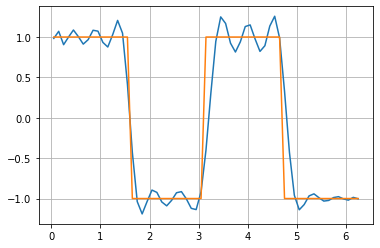

In [9]:
nb_RBF_nodes = 60
the_x_for_test = np.arange(0.05,2*np.pi,0.1)
the_testing_errors_2 = []

sigma = 0.5       #Quelle valeur prendre ?
the_mu_2 = np.linspace(0,2*np.pi,nb_RBF_nodes)  #ne pas mettre les mêmes mu car sinon matrice non inversible. Quelles valeurs prendre ?
#print(len(the_mu))
matrix_phi_transpose_2 = []

for i in range(nb_RBF_nodes):
    matrix_phi_transpose_2.append([phi(x,the_mu_2[i],sigma) for x in the_x_for_test])

matrix_phi_transpose_2= np.array(matrix_phi_transpose_2)
matrix_phi_2 = matrix_phi_transpose_2.T    

 #Solving the system
A_2 = matrix_phi_2.T @ matrix_phi_2
Y_2 = matrix_phi_2.T @ the_fk_2
W_2 = np.linalg.solve(A_2,Y_2)

"""#Computing the training error
test_error = np.mean(np.abs(matrix_phi @ W - testing_set_1))
the_testing_errors.append(test_error)"""

print(len(the_x_for_test))
print(len(matrix_phi_2 @ W_2))


plt.figure()
plt.plot(the_x_for_test, matrix_phi_2 @ W_2)
plt.plot(the_x_for_test, [f2(2*x) for x in the_x_for_test])
plt.grid()
plt.show()

3.2 Regression with noise

In [10]:
#Adding the noise

noise_train = np.random.normal(0,0.1,size=training_set_1.shape)
noise_test = np.random.normal(0,0.1,size=testing_set_1.shape)

training_set_1_noisy = training_set_1 + noise_train
testing_set_1_noisy = testing_set_1 + noise_test

#Delta rule

def delta(training_data, learning_rate, nb_of_nodes, the_mu, sigma, function):  #the size of "the_mu" = nb of hidden nodes

    # training_data is a list of the SHUFFLED 1D (in our problem) patterns
    # the_mu iq the list of the mu of phi_1, ..., phi_n
    # function in the "real" function we want to approximate

    random.shuffle(training_data)        #shuffled list for training
    
    W = np.random.rand(nb_of_nodes)

    phi = lambda x,mu,sigma: np.exp((-(x-mu)**2)/(2*sigma**2))

    for i in range(len(training_data)):
        the_phi = np.array([phi(training_data[i],mu,sigma) for mu in the_mu])
        e = function(training_data[i]) - np.sum(the_phi * W)
        delta_W = learning_rate*the_phi*e
        W = W + delta_W
    
    return W

W = delta(training_set_1_noisy, 0.01, 8, [1,2,3,4,5,6,7,8], 1 , f1)
print(W)

[0.19337212 0.09896527 0.12037334 0.23351524 0.37448162 0.60820446
 0.97990902 0.9432886 ]


In [11]:
#End part 3.2
# Link between rate of convergence and its dependence on the learning rate ?


# main e ets of changing the width of RBFs ?


# estimate their test performance on the original clean data used in section 3.1


# compare your optimal RBF network trained in batch mode with a
# single-hidden-layer perceptron trained with backprop (also in batch
# mode), which you implemented in the  rst lab assignment.

3.3 Competitive learning (CL) to initialise RBF units

In [38]:
""" GROS CACA QUI MARCHE PAS
import numpy as np
import matplotlib.pyplot as plt

# Compare the e ect of the number of RBF units and their width for the two learning approaches.

def CL(training_data, nb_of_nodes, learning_rate,W):

    train_vector = training_data[np.random.randint(0, len(training_data))]
    np.random.shuffle(training_data)
    rbf_nodes = training_data[np.arange(25)]

    for i in range(len(rbf_nodes)):

        sample = rbf_nodes[i]
        the_distances = []

        for elt in W:
            the_distances.append(np.abs(sample - elt)) 
        print(np.shape(the_distances))
        index = np.argpartition(the_distances[:][0], 1)
        winner = np.argmin(index)
        delta_winner = learning_rate*(train_vector - rbf_nodes[winner])
        rbf_nodes[winner] = rbf_nodes[winner] + delta_winner
        
    return rbf_nodes

# At each iteration of CL a training vector is randomly selected from the data

#  The closest RBF unit (usually called the winning unit) is computed, 
# and this unit is updated, in such a way that it gets closer to the training vector.

#  The other units may or may not (depending on the version of CL used) be
# moved towards it too, depending on distance.

phi = lambda x,mu,sigma: np.exp((-(x-mu)**2)/(2*sigma**2))

#Delta rule

def Competitive_delta(training_data, target_data, learning_rate, nb_of_nodes, sigma,W):
    
    # training_data is a list of the SHUFFLED 1D (in our problem) patterns
    # the_mu is the list of the mu of phi_1, ..., phi_n
    # function in the "real" function we want to approximate
    
    mus = CL(training_data, nb_of_nodes, learning_rate,W)
    #shuffled list for training
    random.shuffle(training_data)
    for i in range(len(training_data)):
        the_phi = np.array([phi(training_data[i],mu,sigma) for mu in mus])

        e = target_data[i] - np.linalg.norm(the_phi * W)

        delta_W = learning_rate*the_phi*e
        
        W = W + delta_W
    
    return mus,W


"""

In [ ]:
""" GROS CACA QUI MARCHE PAS"""

"""#For sin(2x) + testing with clean data

x_train = np.arange(0, 2 * np.pi, 0.1)[:, np.newaxis]  # For training data the range is 0 to 2pi
y_train = np.sin(2 * x_train)
x_test = np.arange(0.05, 2 * np.pi, 0.1)[:, np.newaxis]  # Test data starts from 0.05
y_test = np.sin(2 * x_test)


nb_RBF_nodes = 20
sigma = 0.2
learning_rate = 0.01
nb_epoch = 100
random.seed(1)

W_init = np.random.rand(nb_RBF_nodes)
for _ in range(nb_epoch):
    
    the_mu,W = Competitive_delta(x_train, y_train, learning_rate, nb_RBF_nodes, sigma,W_init)

    matrix_phi_transpose = []

    for i in range(nb_RBF_nodes):
        matrix_phi_transpose.append([phi(x,the_mu[i],sigma) for x in x_test])

    matrix_phi_transpose= np.array(matrix_phi_transpose)
    matrix_phi = matrix_phi_transpose.T
    W_init = W

plt.figure()
plt.plot(x_test, matrix_phi @ W, 'r:o', label='learned sin(2x)')
plt.plot(x_test, y_test, "b:o", label="sin(2x)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()"""

In [67]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


EPOCHS = 100
ETA = 0.01
ETA_list = [0.007, 0.01, 0.05, 0.1, 0.2]
ITERATIONS = 10000  # for CL

def generate_data(f_type, noise=False):
    x_train, y_train, x_test, y_test = 0, 0, 0, 0
    # Create y as a sine function
    if f_type == "sin2x":
        x_train = np.arange(0, 2 * np.pi, 0.1)[:, np.newaxis]  # For training data the range is 0 to 2pi
        y_train = np.sin(2 * x_train)
        x_test = np.arange(0.05, 2 * np.pi, 0.1)[:, np.newaxis]  # Test data starts from 0.05
        y_test = np.sin(2 * x_test)

    # Create y square
    if f_type == "square2x":
        x_train = np.arange(0, 2 * np.pi, 0.1)[:, np.newaxis]  # For training data the range is 0 to 2pi
        y_train = np.where(np.sin(2 * x_train) >= 0, 1, -1)
        x_test = np.arange(0.05, 2 * np.pi, 0.1)[:, np.newaxis]  # Test data starts from 0.05
        y_test = np.where(np.sin(2 * x_test) >= 0, 1, -1)

    # Load ballist and balltest and splits the inputs x and outputs y
    if f_type == "ballist":
        train = np.loadtxt("data_lab2/ballist.dat")
        test = np.loadtxt("data_lab2/balltest.dat")

        x_train = train[:, :2]
        y_train = train[:, 2:]
        x_test = test[:, :2]
        y_test = test[:, 2:]

    # Add noise for 3_2, zero mean data with variance 0.1
    # no noise for ballist data
    if noise and f_type != "ballist":
        for i in range(y_train.shape[0]):
            y_train[i] = y_train[i] + np.random.normal(0, 0.1)
        for i in range(y_test.shape[0]):
            y_test[i] = y_test[i] + np.random.normal(0, 0.1)

    return x_train, y_train, x_test, y_test




def competitive_learning(x, deadnode=False):
    np.random.shuffle(x)  # Shuffle data for more random selection
    #rbf_nodes = x[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]  # Select nodes from data
    rbf_nodes = x[np.arange(25)]
    # the higher the number of RBF nodes here, the better the prediction

    # plt.scatter(RBF_nodes, np.zeros(len(RBF_nodes)), color='r', label="RBF nodes before")

    for i in range(ITERATIONS):
        train_vector = x[np.random.randint(0, len(x)), :]  # random vector for training
        distances = []

        for node in rbf_nodes:
            # Calculate distance between training vector and RBF node
            distances.append(np.linalg.norm(node - train_vector))

        # Get indices to sort the nodes (this gives index 0 to the smallest distance,
        # 1 to the next smallest, etc. and index n for the largest distance)
        index = np.argpartition(distances, 1)

        winner = np.argmin(index)  # get best node (smallest distance)
        rbf_nodes[winner] += ETA * (train_vector - rbf_nodes[winner])

        if deadnode:
            # Update the worst node (largest distance) to avoid dead nodes
            loser = np.argmax(index)
            rbf_nodes[loser] += ETA * ETA * (train_vector - rbf_nodes[loser])
            # NOTE: another option here is to select multiple winners!

    #plt.scatter(RBF_nodes, np.zeros(len(RBF_nodes)), color='b', label="RBF nodes after")
    #plt.title("Change of RBF nodes using Competitive Learning")
    #plt.legend()
    #plt.show()

    return rbf_nodes

def predict_square(x, y, mean, variance, w):
    # Use this function to transform the error to 0.0
    phi = phi_matrix(x, mean, variance)

    prediction = np.ones(y.shape)
    prediction[np.where(np.dot(phi, w) >= 0)] = 1
    prediction[np.where(np.dot(phi, w) < 0)] = -1

    return prediction

def phi_matrix(x, mean, variance):
    # Create phi matrix where every element is calculated as the RBF
    # For each data sample and for each RBF
    phi = np.zeros((x.shape[0], mean.shape[0]))
    for i in range(x.shape[0]):
        for j in range(mean.shape[0]):
            # RBF phi as specified in (1)
            phi[i][j] = np.sum(np.exp(-(x[i] - mean[j]) ** 2 / (2 * variance ** 2)))

    return phi

def train_batch(x, y, mean, variance):
    phi = phi_matrix(x, mean, variance)

    # Find w by solving the system in (4)
    w = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, y))

    return w

def train_online_delta_rule(x, y, mean, variance):
    phi = phi_matrix(x, mean, variance)
    w = np.random.rand(1, phi.shape[1])  # random initialisation for weights

    # for ETA in ETA_list:
    mse_list = []
    mae_list = []
    for epoch in range(EPOCHS):
        for i in range(phi.shape[0]):
            phi_i = np.reshape(phi[i], (1, len(phi[i])))  # just to avoid dimension error
            error = y[i] - np.dot(phi_i, w.T)  # error from real value to predicted
            delta_w = ETA * np.dot(phi_i.T, error)  # equation 10
            w += delta_w.T

        y_predicted = np.dot(phi, w.T)

        mse_val = mse(y, y_predicted)


        if epoch > 1:
            mse_list.append(mse_val)

    return w.T

def predict(x, mean, variance, w):
    phi = phi_matrix(x, mean, variance)

    # The prediction is done multiplying RBF phi with the calculated weights w
    return np.dot(phi, w)

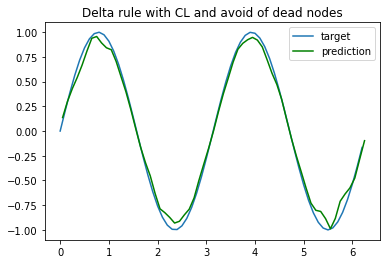

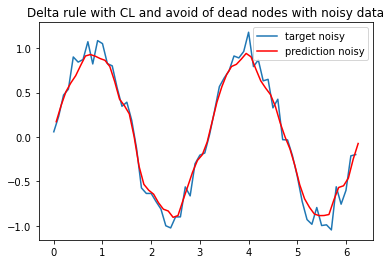

In [92]:
# --------------- Single Hidden Layer Perceptron --------------- #

# --------------- 3.3: Competitive Learning --------------- #

# --------------- Training in Batch --------------- #
f_type = "sin2x"
x_train, y_train, x_test, y_test = generate_data(f_type, True)
x_train_clean, y_train_clean, x_test_clean, y_test_clean = generate_data(f_type, False)
y_predicted = 0
variance = 0.1

rbf_nodes = competitive_learning(x_train.copy())
mean = rbf_nodes
w = train_batch(x_train, y_train, mean, variance)
y_predicted = predict(x_test, mean, variance, w)

rbf_nodes_clean = competitive_learning(x_train_clean.copy())
mean_clean = rbf_nodes_clean
w_clean = train_batch(x_train, y_train, mean, variance)
y_predicted_clean = predict(x_test_clean, mean_clean, variance, w_clean)
nb_epoch = 50
prediction_clean = np.zeros((len(y_predicted_clean),nb_epoch))
prediction = np.zeros((len(y_predicted),nb_epoch))

MSEs_train = np.zeros((nb_epoch,1))
MSE_global_train = []
MSEs_validation = np.zeros((nb_epoch,1))
MSE_global_validation = []

MSEs_train_clean = np.zeros((nb_epoch,1))
MSE_global_train_clean = []
MSEs_validation_clean = np.zeros((nb_epoch,1))
MSE_global_validation_clean = []

for epoch in range(nb_epoch):
    rbf_nodes = competitive_learning(x_train.copy(),True)
    mean = rbf_nodes
    w = train_batch(x_train, y_train, mean, variance)
    prediction[:,epoch] = np.transpose(predict(x_test, mean, variance, w))

    MSEs_train[epoch]=mse(y_train, predict(x_train, mean, variance, train_batch(x_train, y_train, mean, variance)))
    MSEs_validation[epoch]=mse(y_test, predict(x_test, mean, variance, train_batch(x_train, y_train, mean, variance)))

    rbf_nodes_clean = competitive_learning(x_train_clean.copy(),True)
    mean_clean = rbf_nodes_clean
    w_clean = train_batch(x_train_clean, y_train_clean, mean_clean, variance)
    prediction_clean[:,epoch] = np.transpose(predict(x_test_clean, mean_clean, variance, w_clean))

    MSEs_train_clean[epoch]=mse(y_train_clean, predict(x_train_clean, mean, variance, train_batch(x_train_clean, y_train_clean, mean, variance)))
    MSEs_validation_clean[epoch]=mse(y_test_clean, predict(x_test_clean, mean, variance, train_batch(x_train_clean, y_train_clean, mean, variance)))



MSE_global_train = np.mean(MSEs_train,axis=1)
MSE_global_validation = np.mean(MSEs_validation,axis=1)
MSE_global_train_clean = np.mean(MSEs_train_clean,axis=1)
MSE_global_validation_clean = np.mean(MSEs_validation_clean,axis=1)


average_pred = np.mean(prediction,axis=1)
average_pred_clean = np.mean(prediction_clean,axis=1)

#mean_square_error = mse(y_test, y_predicted)
#print("The MSE is: {}".format(mean_square_error))
#mean_absolute_error = mae(y_test, y_predicted)
#print("The absolute residual error is {}".format(mean_absolute_error))

plt.figure(1)
plt.plot(x_train_clean, y_train_clean, label='target')
plt.plot(x_test_clean, average_pred_clean, 'g', label='prediction')
plt.title("Delta rule with CL and avoid of dead nodes")
plt.legend()
plt.show()
plt.figure(2)
plt.plot(x_train, y_train, label='target noisy')
plt.plot(x_test, average_pred, 'r', label='prediction noisy')
plt.title("Delta rule with CL and avoid of dead nodes with noisy data")
plt.legend()
plt.show()



The absolute residual error for variance 0.1 is 0.08935678074406792
The absolute residual error for variance 0.5 is 0.536918550090065
The absolute residual error for variance 1 is 0.6911867538882653
The absolute residual error for variance 1.2 is 3.0934531558546
The absolute residual error for variance 1.5 is 1.294662005428109
The absolute residual error for variance 2 is 1.3988620769321856


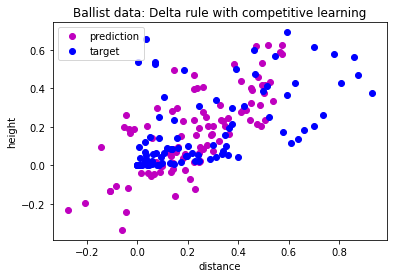

In [97]:

#--------------- Ballist data --------------- #
f_type = "ballist"
x_train, y_train, x_test, y_test = generate_data(f_type, True)
# y_predicted = 0
variance = [0.1,0.5,1,1.2,1.5,2]
rbf_nodes = competitive_learning(x_train.copy())
#print(rbf_nodes)

# Train the RBF network in batch mode
mean = rbf_nodes

for var in variance:
    mean_mae = []
    for i in range(100):
        w = train_batch(x_train, y_train, mean, var)
        y_predicted = predict(x_test, mean, var, w)
        mean_absolute_error = mae(y_test, y_predicted)
        mean_mae.append(mean_absolute_error)  
    
    print("The absolute residual error for variance {} is {}".format(var,np.mean(mean_mae)))

w = train_batch(x_train, y_train, mean, 0.1)
y_predicted = predict(x_test, mean, 0.1, w)

plt.plot(y_predicted[:,0], y_predicted[:,1], 'o', color="m", label="prediction")
plt.plot(y_test[:,0], y_test[:,1], 'o', color="b", label="target")
plt.xlabel("distance")
plt.ylabel("height")
plt.legend()
plt.title("Ballist data: Delta rule with competitive learning")
plt.show()